## FAKE News Classifier: Build a system to identify unreliable news articles

### Data Source: https://www.kaggle.com/c/fake-news/data

### A full training dataset with the following attributes:

#### id: unique id for a news article
#### title: the title of a news article
#### author: author of the news article
#### text: the text of the article; could be incomplete
#### label: a label that marks the article as potentially unreliable
#### 1: unreliable   0: reliable

In [1]:
import pandas as pd
import numpy as np

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /Users/suman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/suman/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv('fake-news/train.csv')

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
# Drop entries with nan values
df = df.dropna()

In [7]:
# Get the independent features
X = df.drop('label', axis = 1)

In [8]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [9]:
# Get the dependent feature
y = df['label']

In [10]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [11]:
df.shape

(18285, 5)

In [12]:
messages = df.copy()

In [13]:
messages.reset_index(inplace = True)

In [14]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [15]:
# Text Preprocessing using Lemmatization (removing special characters and stopwords)
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
lemmatizer = WordNetLemmatizer()
corpus = []

for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [16]:
corpus

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 'civilian killed single u airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery',
 'jackie mason hollywood would love trump bombed north korea lack trans bathroom exclusive video breitbart',
 'beno hamon win french socialist party presidential nomination new york time',
 'back channel plan ukraine russia courtesy trump associate new york time',
 'obama organizing action partner soros linked indivisible disrupt trump agenda',
 'bbc comedy sketch real housewife isi cause outrage',
 'russian researcher discover secret nazi military base treasure hunter arctic photo',
 'u official see link trump russia',
 'yes paid government troll social medium blog forum website',
 'major league soccer argentine find home success new york time',
 'well fargo chief abruptly step new york time',
 'anonymous donor pay 

In [17]:
# Creating TF-IDF model using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features = 5000, ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [18]:
X.shape

(18285, 5000)

In [19]:
y = messages['label']

In [20]:
# Divide dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0)

In [21]:
tfidf_v.get_feature_names()[:20]

['abandon',
 'abandoned',
 'abc',
 'abc news',
 'abe',
 'abedin',
 'able',
 'abortion',
 'abroad',
 'absolutely',
 'absurd',
 'abuse',
 'abuse new',
 'abuse new york',
 'academy',
 'accept',
 'accepting',
 'access',
 'access pipeline',
 'access pipeline protest']

In [22]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [23]:
count_df = pd.DataFrame(X_train, columns = tfidf_v.get_feature_names())

In [24]:
count_df.head()

,abandon,abandoned,abc,abc news,abe,abedin,able,abortion,abroad,absolutely,...,zealand,zero,zika,zika virus,zionist,zone,zone new,zone new york,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
import matplotlib.pyplot as plt

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## MultinomialNB Algorithm

In [27]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [29]:
from sklearn import metrics
import itertools

Accuracy Score: 0.8809
Confusion matrix, without normalization


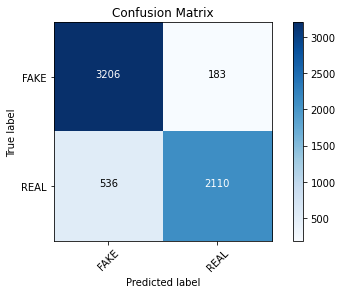

In [30]:
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy Score: {:.4f}".format(accuracy_score))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_matrix, classes=['FAKE','REAL'])

## MultinomialNB with Hyperparameter

In [31]:
classifier = MultinomialNB(alpha = 0.1)

In [32]:
previous_accuracy_score = 0
for alpha in np.arange(0, 1, 0.1):
    sub_classifier = MultinomialNB(alpha = alpha)
    sub_classifier.fit(X_train, y_train)
    y_pred = sub_classifier.predict(X_test)
    accuracy_score = metrics.accuracy_score(y_test, y_pred)
    if(accuracy_score > previous_accuracy_score):
        classifier = sub_classifier
    print("Alpha: {:.1f}, Accuracy Score: {:.4f}".format(alpha, accuracy_score))

/Users/suman/opt/miniconda3/envs/nlp/lib/python3.6/site-packages/sklearn/naive_bayes.py:509: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Accuracy Score: 0.8613
Alpha: 0.1, Accuracy Score: 0.8742
Alpha: 0.2, Accuracy Score: 0.8767
Alpha: 0.3, Accuracy Score: 0.8784
Alpha: 0.4, Accuracy Score: 0.8804
Alpha: 0.5, Accuracy Score: 0.8814
Alpha: 0.6, Accuracy Score: 0.8812
Alpha: 0.7, Accuracy Score: 0.8814
Alpha: 0.8, Accuracy Score: 0.8807
Alpha: 0.9, Accuracy Score: 0.8807


In [33]:
# Get Features names
feature_names = tfidf_v.get_feature_names()

In [34]:
# Get coefficient value
classifier.coef_[0]

/Users/suman/opt/miniconda3/envs/nlp/lib/python3.6/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([-8.976482  , -9.41275391, -8.47443892, ..., -9.8733866 ,
       -8.34756243, -9.04252645])

In [35]:
# Most real
sorted(zip(classifier.coef_[0], feature_names), reverse = True)[:20]

[(-4.910265954034321, 'hillary'),
 (-4.94225946983906, 'trump'),
 (-5.044397065550441, 'clinton'),
 (-5.433924979853259, 'election'),
 (-5.68241345582253, 'video'),
 (-5.729800073434574, 'comment'),
 (-5.752767372661269, 'war'),
 (-5.843339722389779, 'hillary clinton'),
 (-5.845342132966717, 'fbi'),
 (-5.902551334004703, 'world'),
 (-5.989051128305048, 'email'),
 (-6.076013872466914, 'obama'),
 (-6.086002623343832, 'america'),
 (-6.117514158940647, 'russia'),
 (-6.196740556174059, 'american'),
 (-6.203890250726921, 'day'),
 (-6.2698207809353175, 'donald'),
 (-6.302831846069081, 'donald trump'),
 (-6.332502099918548, 'de'),
 (-6.336824989584063, 'wikileaks')]

In [36]:
# Most fake
sorted(zip(classifier.coef_[0], feature_names))[:20]

[(-9.873386595605634, 'abe'),
 (-9.873386595605634, 'abroad'),
 (-9.873386595605634, 'abuse new'),
 (-9.873386595605634, 'abuse new york'),
 (-9.873386595605634, 'accord'),
 (-9.873386595605634, 'act new'),
 (-9.873386595605634, 'act new york'),
 (-9.873386595605634, 'advice'),
 (-9.873386595605634, 'adviser new'),
 (-9.873386595605634, 'adviser new york'),
 (-9.873386595605634, 'affordable'),
 (-9.873386595605634, 'age new'),
 (-9.873386595605634, 'age new york'),
 (-9.873386595605634, 'agenda breitbart'),
 (-9.873386595605634, 'ailes'),
 (-9.873386595605634, 'aleppo new'),
 (-9.873386595605634, 'aleppo new york'),
 (-9.873386595605634, 'ali'),
 (-9.873386595605634, 'america breitbart'),
 (-9.873386595605634, 'america new york')]